In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


In [5]:
df=pd.read_csv('wine.csv')

In [6]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
norm=normalize(df)

In [8]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [9]:
norm

array([[9.32148040e-04, 1.32644666e-02, 1.59397315e-03, ...,
        9.69433961e-04, 3.65402032e-03, 9.92737662e-01],
       [9.47939004e-04, 1.25127948e-02, 1.68733143e-03, ...,
        9.95335954e-04, 3.22299261e-03, 9.95335954e-01],
       [8.40654226e-04, 1.10630096e-02, 1.98394397e-03, ...,
        8.65873852e-04, 2.66487390e-03, 9.96175257e-01],
       ...,
       [3.55447904e-03, 1.57226456e-02, 5.07105676e-03, ...,
        6.99047544e-04, 1.84832910e-03, 9.89329998e-01],
       [3.53384139e-03, 1.55135637e-02, 3.05088307e-03, ...,
        7.06768278e-04, 1.90827435e-03, 9.89475589e-01],
       [5.27254850e-03, 2.48337034e-02, 7.20581628e-03, ...,
        1.07208486e-03, 2.81202587e-03, 9.84209053e-01]])

In [10]:
norm.shape

(178, 14)

In [11]:
pca = PCA()
pca_values = pca.fit(norm)

In [12]:
pca = PCA(n_components = 3)
pca_values=pca.fit(norm)
pca_data=pca_values.transform(norm)

In [13]:
var = pca.explained_variance_ratio_
var

array([0.97699301, 0.01349697, 0.00463673])

In [14]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([97.7 , 99.05, 99.51])

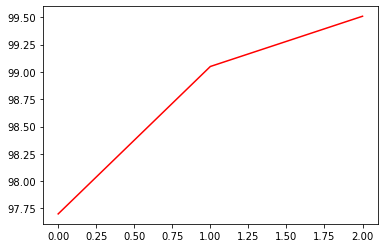

In [15]:
plt.plot(var1,color="red")

In [16]:
pca_data.shape

(178, 3)

## using clustering

### hierarichal clustering

In [17]:
import scipy.cluster.hierarchy as hc

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
import matplotlib.pyplot as plt

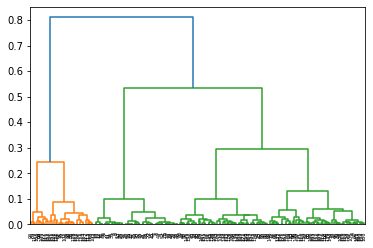

In [20]:
dendogram=hc.dendrogram(hc.linkage(pca_data,method='ward'))

In [21]:
ac=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [30]:
cluster=ac.fit(pca_data)

In [31]:
data=cluster.labels_

In [32]:
df3=pd.DataFrame(data,columns=['cluster'])

In [33]:
df3

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [34]:
cdf=pd.concat([df,df3],axis=1)

In [35]:
cdf

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [36]:
pdf=cdf[cdf['cluster']==1]
pdf['Type'].value_counts()

2    29
3    12
Name: Type, dtype: int64

In [29]:
?AgglomerativeClustering

In [40]:
cdf['cluster'].value_counts()

0    127
1     41
2     10
Name: cluster, dtype: int64